Python_Machine_Learning.pdf - chapter2 - Implementing a perceptron learning algorithm in Python

learn from data via a
fit method, and make predictions via a separate predict method. 
As a convention,
we add an underscore to attributes that are not being created upon the initialization
of the object but by calling the object's other methods—for example, self.w_ .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float // Learning rate (between 0.0 and 1.0)
    n_iter : int // Passes over the training dataset.
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where 
        
        n_samples is the number of samples 
        and
        n_features is the number of features.
        
        y : array-like, shape = [n_samples]
        Target values.
        Returns -> self : object
        """
        
        '''
        Attributes
        -----------
        w_ : 1d-array // Weights after fitting.
        errors_ : list // Number of misclassifications in every epoch.
        '''
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter): # 학습률 구하기
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi # 계수 업데이트
                self.w_[0] += update # intercept 업데이트
                errors += int(update != 0.0) # 에러율
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0] # 내적에 의한 판별

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1) # 0, 1 activation 함수

petal=꽃잎 // sepal=꽃받침
<img src='iris_petal_sepal.png', width=150, height=100>
<img src='iris-data-analysis-example-in-r-3-638.jpg', width=480>

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [12]:
df = df.rename(columns=pd.Series(['Sepal length', 'Sepal Width', 'Petal length', 'Petal Width', 'Species']))

In [22]:
df[40:51]

,Sepal length,Sepal Width,Petal length,Petal Width,Species
40,5.0,3.5,1.3,0.3,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
43,5.0,3.5,1.6,0.6,Iris-setosa
44,5.1,3.8,1.9,0.4,Iris-setosa
45,4.8,3.0,1.4,0.3,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
48,5.3,3.7,1.5,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa


In [20]:
X[:5]

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4]])

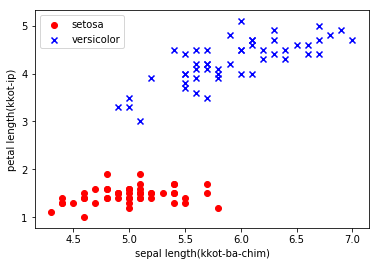

In [26]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# 꽃받침 길이, 꽃잎 길이만 뽑아냄
X = df.iloc[0:100, [0, 2]].values

# setosa의 꽃받침() 길이, 꽃잎 길이
plt.scatter(X[:50, 0], X[:50, 1], color='red', 
            marker='o', label='setosa')

# versicolor의 꽃받침 길이, 꽃잎 길이
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', 
            marker='x', label='versicolor')

plt.ylabel('petal length(kkot-ip)')
plt.xlabel('sepal length(kkot-ba-chim)')
plt.legend(loc='upper left')
plt.show()

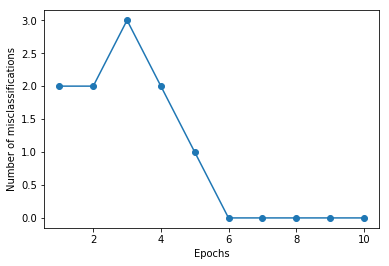

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)
# X = setosa + versicolor // y = setosa(-1), versicolor(1)
# X중에서 setosa를 얼마나 잘 분류하는가?
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

# epoch가 진행될 수록 오분류가 적어지고 있음을 확인할 수 있다.

# our perceptron already converged after the sixth epoch and 
# should now be able to classify the training samples perfectly.

In [36]:
np.unique(y)

array([-1,  1])